In [1]:
#BUSINESS & DATA UNDERSTANDING

#We are analyzing Stack Overflow's 2017 Survey data to answer several questions about one of the most popular jobs all over
#the world - software developer. The quesations are:
#1. Is it better to work remotely?
#2. How does Company Size relate to Job Satisfaction and Salary?
#3. What to assess in potential jobs?

In [2]:
#First let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import the data
df = pd.read_csv('./survey_results_public.csv')

#and check what the data looks like
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Check the shape
df.shape

(19102, 154)

In [4]:
#It looks like we have nearly 150 different questions, but we don't need all of them.
#Lets start the next phase of CRISP-DM Process to leave only the data we need:

#DATA PREPARATION


In [5]:
# Create new dataframe with only the columns we need
sat_df = df[['Professional','JobSatisfaction', 'HomeRemote', 'CompanySize','Salary']]

#All the columns we need have "Assess" in their name, so we can add them using loop:
for col in list(df.columns):
    if "Assess" in col:
        sat_df[col]=df[col]

#this loop will also add 'MetricAssess' column which we don't need but we'll drop it soon


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
sat_df.head()

,Professional,JobSatisfaction,HomeRemote,CompanySize,Salary,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,...,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,MetricAssess
0,Student,NaN,NaN,NaN,NaN,Very important,Very important,Important,Very important,Very important,...,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,NaN
1,Student,NaN,"More than half, but not all, the time",20 to 99 employees,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Customer satisfaction; On time/in budget; Peer...
2,Professional developer,9.0,"Less than half the time, but at least one day ...","10,000 or more employees",113750.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Customer satisfaction; Benchmarked product per...
3,Professional non-developer who sometimes write...,3.0,"Less than half the time, but at least one day ...","10,000 or more employees",NaN,Somewhat important,Somewhat important,Somewhat important,Important,Important,...,Important,Very important,Important,Somewhat important,Not very important,Very important,Important,Very important,Very important,NaN
4,Professional developer,8.0,Never,10 to 19 employees,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#We only need to analyze professional developers, so we apply filter to 'Professional' column
sat_df = sat_df[sat_df['Professional']=='Professional developer']

In [8]:
#Drop unnecessary columns:
#'Metricassess' - which was added previously by our loop;
#'Professional' - cause there're only 'Professional Developers'
sat_df.drop(['MetricAssess','Professional'], axis=1, inplace=True)

In [9]:
#Check nulls
sat_df.isna().sum()

JobSatisfaction           412
HomeRemote                299
CompanySize              1665
Salary                   8765
AssessJobIndustry        7465
AssessJobRole            7461
AssessJobExp             7467
AssessJobDept            7476
AssessJobTech            7453
AssessJobProjects        7453
AssessJobCompensation    7459
AssessJobOffice          7515
AssessJobCommute         7511
AssessJobRemote          7500
AssessJobLeaders         7515
AssessJobProfDevel       7507
AssessJobDiversity       7520
AssessJobProduct         7517
AssessJobFinances        7503
dtype: int64

In [10]:
#So JobSatisfaction is our Target column so we can just delete all 412 rows where the column is null
sat_df.dropna(subset=['JobSatisfaction'],inplace=True)

#There are 18 null values left in HomeRemote column and we might drop them as well
sat_df.dropna(subset=['HomeRemote'],inplace=True)

In [ ]:
#We can now start answering Questions:

#1. Is it better to work remotely?

#For this we check average satisfaction rating for groupsin HomeRemote

In [11]:
#but first, HomeRemote column has too many distinct values, so we create new column - 'corrHomeRemote' to create larger groups
sat_df['corrHomeRemote']=np.where(sat_df['HomeRemote']=="All or almost all the time (I'm full-time remote)",'Always',
                                 np.where(sat_df['HomeRemote']=="Never", "Never",
                                         np.where(sat_df['HomeRemote']=="It's complicated","It's complicated", "Sometimes")))

#Get average JobSatisfaction Rating for each corrHomeRemote group and sort them
home_remote_avg = sat_df[['corrHomeRemote','JobSatisfaction']].groupby(['corrHomeRemote']).mean()
home_remote_avg.sort_values(by='JobSatisfaction', ascending=False, inplace=True)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

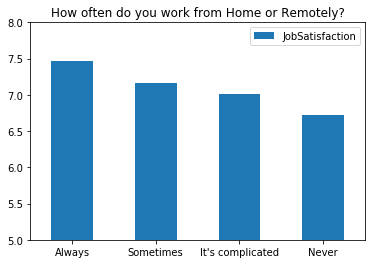

In [12]:
#Plot JobSatisfaction rating averages
home_remote_avg.plot(kind='bar').xaxis.set_label_text("")
plt.title("How often do you work from Home or Remotely?")
plt.ylim(top=8)
plt.ylim(bottom=5)
plt.xticks(rotation='horizontal')

In [ ]:
#It looks like developers who work remotely have relatively higher average satisfaction ration then those who don't

In [ ]:
#Now we can proceed to our second qustion:

#2. How does Company Size relate to Job Satisfaction and Salary?

In [13]:
#First we reduce string length to create a better chart, with less characters
sat_df['corrCompanySize']=np.where(sat_df['CompanySize']=="I don't know","I don't know",
                                 np.where(sat_df['CompanySize']=="I prefer not to answer", "No Answer",
                                          sat_df['CompanySize'].str.replace(' employees','')))

In [14]:
#Create new dataframe, drop nulls and leave only the columns we need
company_size_df = sat_df.dropna(subset=['Salary','corrCompanySize'])
company_size_df = company_size_df[['JobSatisfaction','Salary','corrCompanySize']]

In [15]:
# We need to normalize Salary and JobSatisfaction to make it possible to put them on the same graph

#Create Normalization function
#Input: a numeric column
#Output: column normalized in the range of -1 to 1
def normalize(col):
    #we get the value with maximum deviation from the mean
    max_size = np.amax([col.max()-col.mean(), col.mean()-col.min()])
    #and for each value of the column we return the value / maximum daviation
    return (col-col.mean())/max_size
    #so for the value with maximum daviation we get 1 or -1 (depends if its lower or higher than the mean)
    #an for all other values we get a value from -1 to 1

In [16]:
#Normalize Salary and JobSatisfaction
company_size_df['Salary_Scaled']=normalize(company_size_df['Salary'])
company_size_df['JobSatisfaction_Scaled']=normalize(company_size_df['JobSatisfaction'])

In [17]:
#Now that we have normalized values, we don't need the original ones and we can drop them:
company_size_df.drop(['Salary','JobSatisfaction'],axis=1,inplace=True)

In [18]:
#Then we create table for visualisation
sz_table = company_size_df.groupby(['corrCompanySize']).mean().sort_values(by=['Salary_Scaled'])

In [19]:
#Reindex table to sort them in our desired order:
sz_table = sz_table.loc[['Fewer than 10','10 to 19','20 to 99','100 to 499','500 to 999','1,000 to 4,999',
                        '5,000 to 9,999','10,000 or more',"I don't know",'No Answer']]

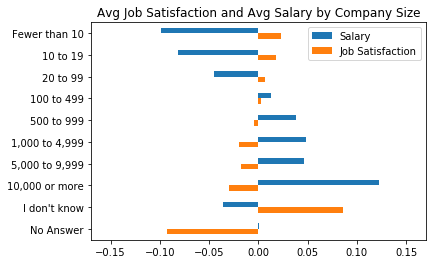

In [20]:
#Finally we reate a Graph
sz_plot = sz_table.plot.barh(xlim=(-0.17,0.17))

sz_plot.set_title('Avg Job Satisfaction and Avg Salary by Company Size')
sz_plot.legend(['Salary','Job Satisfaction'])
sz_plot.yaxis.set_label_text("")

sz_plot.invert_yaxis()

In [ ]:
#Interesting, as company size increases, so does the average salary, but satisfaction rating decreases.

In [ ]:
#Now we can go to our third question:

#3. What to assess in potential jobs?

#for this we should look at what the most satisfied developers assess in their potential jobs

In [21]:
#So we need a dataframe with JobSatisfaction and all the "Assess" columns
#first we create new dataframe
assess_df = sat_df[['JobSatisfaction']]

#add all the columns that contain "Assess" with a loop
for col in list(sat_df.columns):
    if "Assess" in col:
        assess_df[col]=sat_df[col]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
#Check nulls
assess_df.isna().sum()

JobSatisfaction             0
AssessJobIndustry        7208
AssessJobRole            7204
AssessJobExp             7211
AssessJobDept            7219
AssessJobTech            7195
AssessJobProjects        7197
AssessJobCompensation    7200
AssessJobOffice          7259
AssessJobCommute         7256
AssessJobRemote          7242
AssessJobLeaders         7256
AssessJobProfDevel       7250
AssessJobDiversity       7264
AssessJobProduct         7259
AssessJobFinances        7247
dtype: int64

In [23]:
#That's a lot of nulls, let's drop them
assess_df.dropna(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
#We need to create heatmap with Importance on x Axis and what developers assess on Y. Let's create such table:
#Unpivot Data
assess_table = pd.melt(assess_df, id_vars=['JobSatisfaction'], value_vars=['AssessJobIndustry', 'AssessJobRole', 'AssessJobExp',
       'AssessJobDept', 'AssessJobTech', 'AssessJobProjects',
       'AssessJobCompensation', 'AssessJobOffice', 'AssessJobCommute',
       'AssessJobRemote', 'AssessJobLeaders', 'AssessJobProfDevel',
       'AssessJobDiversity', 'AssessJobProduct', 'AssessJobFinances'])

In [25]:
#Group data by what people assess and importance
assess_table = assess_table.groupby(['variable','value']).mean()

In [26]:
#Reindex to create pivottable
assess_table = assess_table.reset_index()

#Create pivottable
assess_table = assess_table.pivot(index='variable', columns='value', values='JobSatisfaction')

In [27]:
#Rearrange columns to give importance ascending order
assess_table=assess_table[['Not at all important','Not very important','Somewhat important','Important','Very important']]

[Text(0.5,0,'Not at all important'),
 Text(1.5,0,'Not very important'),
 Text(2.5,0,'Somewhat important'),
 Text(3.5,0,'Important'),
 Text(4.5,0,'Very important')]

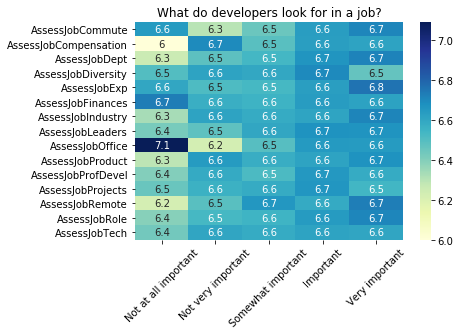

In [28]:
#Create Heatmap
ax = sns.heatmap(assess_table, cmap="YlGnBu", annot=True)
ax.set_title('What do developers look for in a job?')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [ ]:
# There are 2 important findings in the heatmap:
# 1. Developers don't find it important to AssessJobCompensation or AssessJobRemote have relatively low satisfaction rate
# 2. Developers who Find all the criteria Somwhat important, important or very important, have realtively high satisfaction rate